# EDA

In [2]:
# Importando bibliotecas necessárias
# ----------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


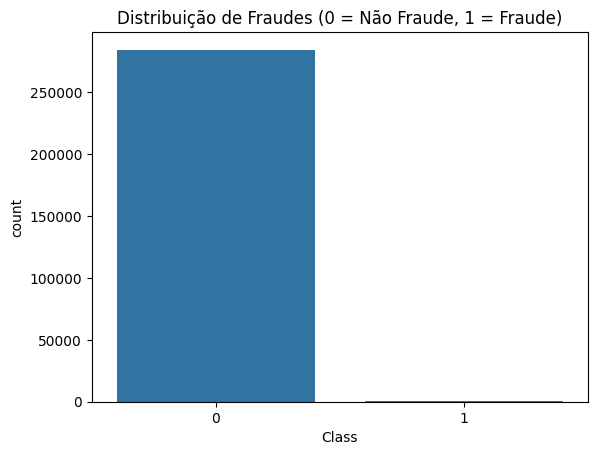

In [5]:
df = pd.read_csv("creditcard.csv")
print(df["Class"].value_counts(normalize=True)) # Proporção de fraudes

# Grafícos das fraudes vs. não fraudes
sns.countplot(x="Class", data=df)
plt.title("Distribuição de Fraudes (0 = Não Fraude, 1 = Fraude)")
plt.show()

# Pré-processamento

In [13]:
# Importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [14]:
# 1. Normalizar 'Amount' e 'Time'
scaler = StandardScaler()
df["Amount_scaled"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time_scaled"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

# 2. Separar features (X) e target (y)
X = df.drop(["Class", "Time", "Amount"], axis=1)
y = df["Class"]

# 3. Balancear com SMOTE (cria exemplos sintéticos de fraudes)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Treiando o Modelo (XGBOOST)

In [17]:
# Importações essenciais
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [18]:
# 1. Carregar dados e pré-processar
df = pd.read_csv("creditcard.csv")
X = df.drop(["Class", "Time", "Amount"], axis=1)
y = df["Class"]

# 2. Balancear com SMOTE
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

# 3. Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# 4. Treinar XGBoost
model = XGBClassifier(
    scale_pos_weight=len(y_res[y_res == 0]) / len(y_res[y_res == 1]),  # Peso para fraudes
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1  # Usa todos os núcleos do CPU
)
model.fit(X_train, y_train)

# 5. Avaliar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589


Matriz de Confusão:
[[84145  1004]
 [ 2866 82574]]


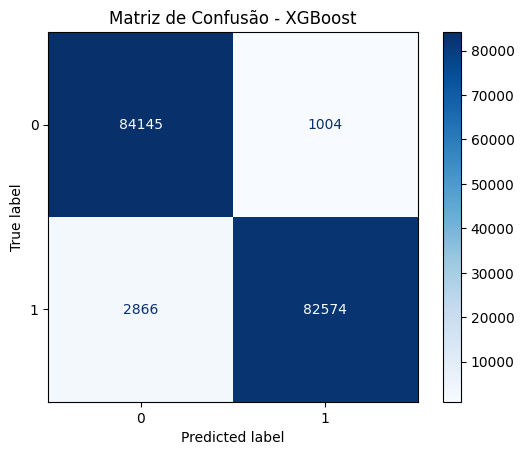

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusão - XGBoost')
plt.savefig('confusion_matrix.png')  # Salva para o README

<ipython-input-22-22729cafead4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


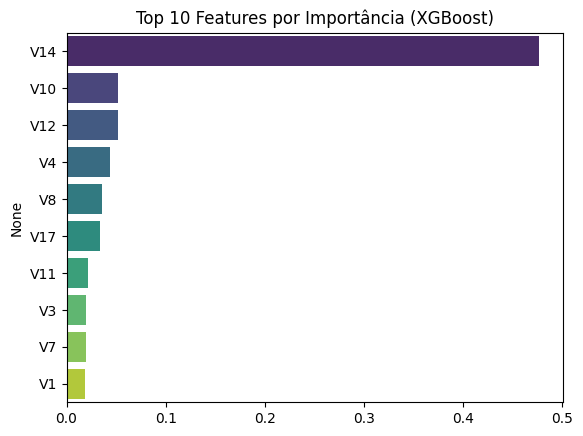

In [22]:
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feat_importances.nlargest(10)

sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Features por Importância (XGBoost)')
plt.savefig('feature_importance.png')

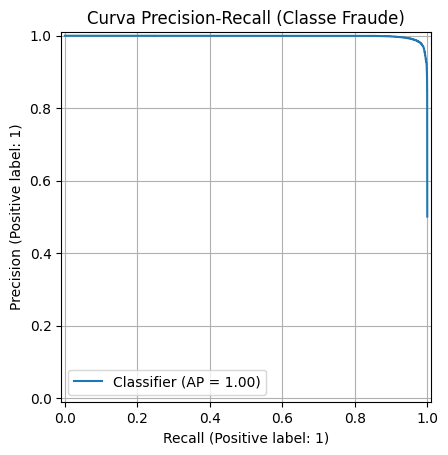

In [24]:
# Obter as probabilidades previstas (não apenas as classes 0/1)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe "fraude"

# Agora sim, plotar a curva
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_predictions(y_test, y_probs)
plt.title('Curva Precision-Recall (Classe Fraude)')
plt.grid()
plt.savefig('precision_recall.png')  # Salva a imagem
plt.show()